https://proglib.io/p/unsupervised-ml-with-python

# **Метод k-средних**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('WineQT.csv')

# quality = {3:6, 4:33, 5:483, 6:462, 7:143, 8:16}

# names = ['fixed acidity','volatile acidity','citric acid','residual sugar',
#      'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
#      'sulphates','alcohol','quality','Id']

df_copy = df[df['quality'].isin([5,6,7])]
df_copy = df_copy[['volatile acidity', 'total sulfur dioxide', 'sulphates','alcohol', 'quality']]
df_copy['quality'] = df_copy['quality']

target = df_copy.pop('quality')

# Разделение набора данных
x_axis = df_copy['alcohol']
y_axis = df_copy['sulphates']

# Построение
plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.scatter(x_axis, y_axis, c=target)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


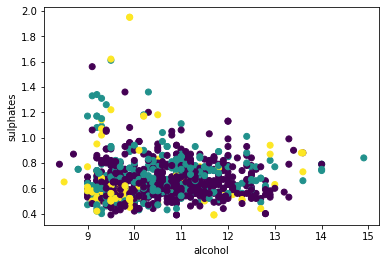

In [28]:
# Импортируем библиотеки
from sklearn.cluster import KMeans

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(df_copy)

# Предсказание на единичном примере
predicted_label = model.predict([[0.58, 18, 0.57, 9.5]])

# Предсказание на всем наборе данных
all_predictions = model.predict(df_copy)

# Выводим предсказания
print(predicted_label)
# print(all_predictions)

# Построение
plt.clf()
plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.scatter(x_axis, y_axis, c=all_predictions)

In [29]:
print((all_predictions == target-5).value_counts())

False    699
True     389
Name: quality, dtype: int64


# **Понижение размерности с методом t-SNE**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


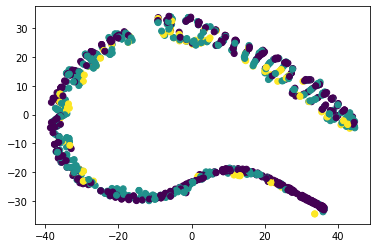

In [33]:
# Импорт библиотек
from sklearn.manifold import TSNE

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(df_copy)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=target)
plt.show()

# **Метод кластеризации на основе плотности DBSCAN**

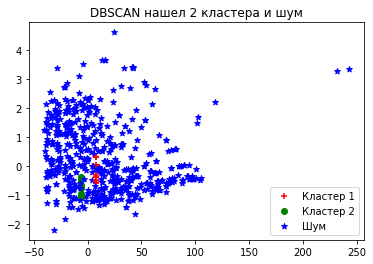

In [32]:
# Импортируем библиотеки
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Определяем модель
dbscan = DBSCAN()

# Обучаем
dbscan.fit(df_copy)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(df_copy)
pca_2d = pca.transform(df_copy)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()